## Problem 1 (c)

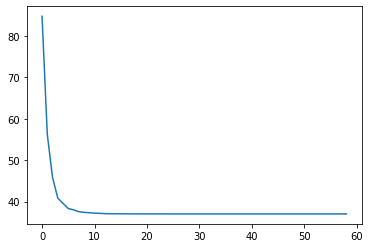

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def obj(A,y,x):
    return np.linalg.norm(y-A@x)**2

# Parameters
m = 100
n = 50
rho = 0.5
eta = 0.5
grad_tol= 1e-3 

# Data generation
np.random.seed(1)
A = np.random.normal(0,1,(m,n))
y = np.random.normal(0,1,(m,1))
x = np.zeros((n, 1))

# Gradient and Loss at the initialization
grad = 2*A.T@(A@x-y)
loss = [obj(A,y,x)]

while np.linalg.norm(grad) > grad_tol:
    grad = 2*A.T@(A@x-y)
    # Line search
    t = 1 
    while obj(A,y,x-t*grad) - obj(A,y,x) > -eta*t*np.linalg.norm(grad)**2:
        t = rho*t
    # Gradient descent
    x = x-t*grad
    loss.append(obj(A,y,x))

plt.plot(loss)

## Problem 1 (f) 

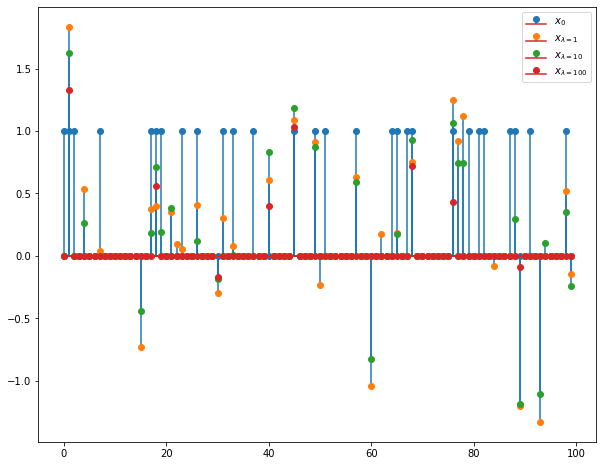

In [ ]:
import cvxpy as cp

def obj(A,y,x,lambd):
    return cp.norm2(y-A@x)**2 + lambd*cp.norm1(x)

def generate_data():
    np.random.seed(1)
    A = np.random.normal(0,1,(30,100))
    x_star = np.random.binomial(1,0.2,(100,1))
    y = A@x_star + np.random.normal(0,0.5,(30,1))
    return A,x_star,y


# generate data
A,x_star,y = generate_data()

# define variable for solver
x = cp.Variable((100,1))
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(obj(A,y,x,lambd)))

lambd_list = [1,10,100]
x_pred = []
# solve for each lambda
for l in lambd_list:
    lambd.value = l
    problem.solve()
    x_pred.append(x.value)

# plot
markers = ['C0o', 'C1o', 'C2o', 'C3o']
labels = ['$x_0$', '$x_{\lambda=1}$', '$x_{\lambda=10}$', '$x_{\lambda=100}$']
plt.figure(figsize=(10, 8))
plt.stem(x_star, use_line_collection=True, linefmt='-', label=labels[0], markerfmt=markers[0])
for x,  m, l in zip(x_pred, markers[1:], labels[1:]):
    plt.stem(x, use_line_collection=True, linefmt='-', label=l, markerfmt=m)
plt.legend()
plt.show()

With increasing $\lambda$, the optimal $x_*$ becomes more sparse. 

## Problem 2 (d)(e)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


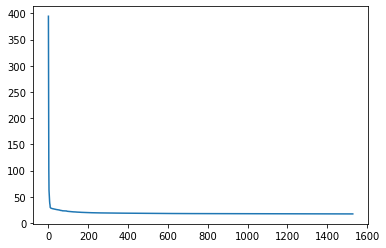

In [8]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn import linear_model,metrics

def obj(w,y,x):
    return np.sum(np.log(1+np.exp(-y*x@w)))

def grad(w,y,x): 
    return  x.T @ (-y*np.exp(-y*x@w) / (1+np.exp(-y*x@w)))

rho = 0.5
eta = 0.5
grad_tol = 1e-1

data = load_breast_cancer()
x = data.data
x = sklearn.preprocessing.scale(x)
y = np.sign(data.target.reshape(x.shape[0], 1)-0.5)
w = np.zeros((x.shape[1],1))

obj_grad = grad(w,y,x)
obj_func = []


while np.linalg.norm(obj_grad) > grad_tol:
    obj_func += [obj(w,y,x)]
    obj_grad = grad(w,y,x)
    t = 1
    while obj(w-t*obj_grad,y,x) - obj(w,y,x) > - eta*t*np.linalg.norm(obj_grad)**2:
        t = rho*t
    w = w-t*obj_grad

plt.plot(obj_func)
plt.show()

In [9]:
y_gd = 1/(1 + np.exp(-x @ w))
y_gd[y_gd > 0.5] = 1
y_gd[y_gd <= 0.5] = -1
base_lr_model = linear_model.LogisticRegression()
base_lr_model.fit(x, y.reshape(y.shape[0],))
y_sk = base_lr_model.predict(x)
print(f'Sklearn Accuracy: {metrics.accuracy_score(y_sk, y)}')
print(f'Gradient Descent Accuracy: {metrics.accuracy_score(y_gd, y)}')

Sklearn Accuracy: 0.9876977152899824
Gradient Descent Accuracy: 0.9929701230228472
